#### KERAS 모델 구성 이해
- 모델 설계
- 모델 생성
- 모델 학습

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

#### [1] 데이터 준비 <hr>

In [8]:
# Load the iris dataset
iris = load_iris()
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### [2] 훈련 데이터 준비 <hr>

In [11]:
data = irisDF[irisDF.columns[0:3]]
target = irisDF['petal width (cm)']

#### [3] 모델 설계 <hr>

In [16]:
# 모델 설계
irisModel = Sequential(name = 'iris_model')

In [17]:
# 입력층
irisModel.add(Dense(10, input_shape=(3,), name='In'))
irisModel.add(Activation('relu'))

# 은닉층
irisModel.add(Dense(8, activation='relu', name='Hidd'))


# 출력층
irisModel.add(Dense(1, activation='linear', name='Out'))

In [18]:
irisModel.summary()

Model: "iris_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 In (Dense)                  (None, 10)                40        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 Hidd (Dense)                (None, 8)                 88        
                                                                 
 Out (Dense)                 (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


### [4] 모델 생성 <hr>

In [24]:
# 모델 컴파일
irisModel.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae','mse'])

### [5] 학습 <hr>

In [25]:
from keras import callbacks

In [26]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시
class PrintDot(callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
      print('')
    print('.', end='')

In [27]:
EPOCHS = 500

# 모델 훈련
# history에 훈련 과정의 모든 정보가 저장됨
# 한 에포크 돌고 callback 함수 실행
history = irisModel.fit(data, target,
                        epochs=EPOCHS, 
                        validation_split = 0.2, 
                        verbose=0,
                        callbacks=[PrintDot()])
print(f'\n학습 종료')


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
학습 종료


#### [5-1] 모델 학습 과정 정보 확인 <hr>

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.500505,0.636583,0.500505,1.257468,1.087342,1.257468,495
496,0.500462,0.636491,0.500462,1.255850,1.086597,1.255850,496
497,0.500303,0.636338,0.500303,1.254599,1.086022,1.254599,497
498,0.500203,0.636233,0.500203,1.253358,1.085451,1.253358,498
499,0.500138,0.636137,0.500138,1.251911,1.084784,1.251911,499


In [29]:
epochs, values = hist['epoch'].values, hist['mae'].values

In [30]:
import matplotlib.pyplot as plt

def plot_history():
    
    plt.figure(figsize=(10, 12))
    
    plt.subplot(2, 1, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error  [MAE]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.ylim([0,5])
    plt.title("[MAE]")
    plt.legend()
    
    
    plt.subplot(2, 1, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MSE^2$]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.ylim([0,5])
    plt.title("[$MSE^2$]")
    plt.legend()
    plt.show()

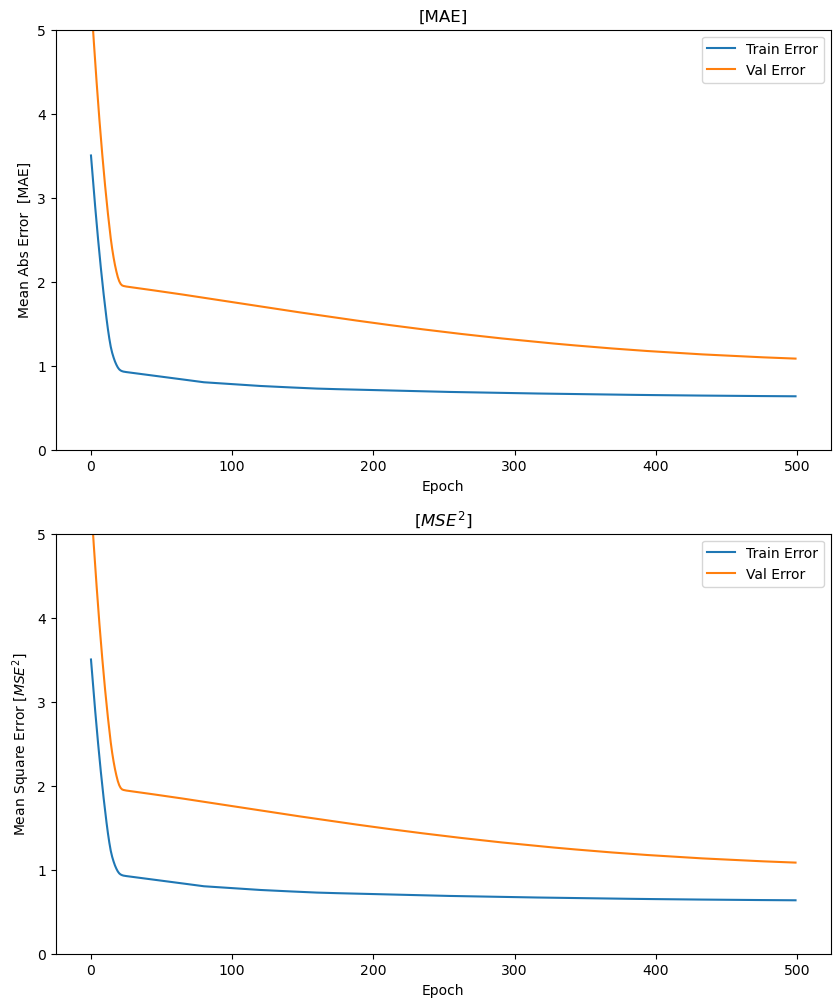

In [31]:
plot_history()

#### [5-2] 학습 - 조기종료 <hr>

In [32]:
# patience 매개변수 : 성능 향상을 체크할 에포크 횟수
EARLY_STOP = callbacks.EarlyStopping(monitor='val_loss', patience=10)

EPOCHS = 200

history = irisModel.fit(data, target,
                        epochs=EPOCHS,
                        validation_split = 0.2,
                        verbose=0,
                        callbacks=[EARLY_STOP, PrintDot()])


....................................................................................................
....................................................................................................

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
#plot_history()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
195,0.495631,0.626203,0.495631,1.126791,1.025493,1.126791,195
196,0.495633,0.626186,0.495633,1.126484,1.025343,1.126484,196
197,0.495631,0.626171,0.495631,1.126426,1.025315,1.126426,197
198,0.495634,0.626152,0.495634,1.125893,1.025055,1.125893,198
199,0.495624,0.626113,0.495624,1.125650,1.024936,1.125650,199


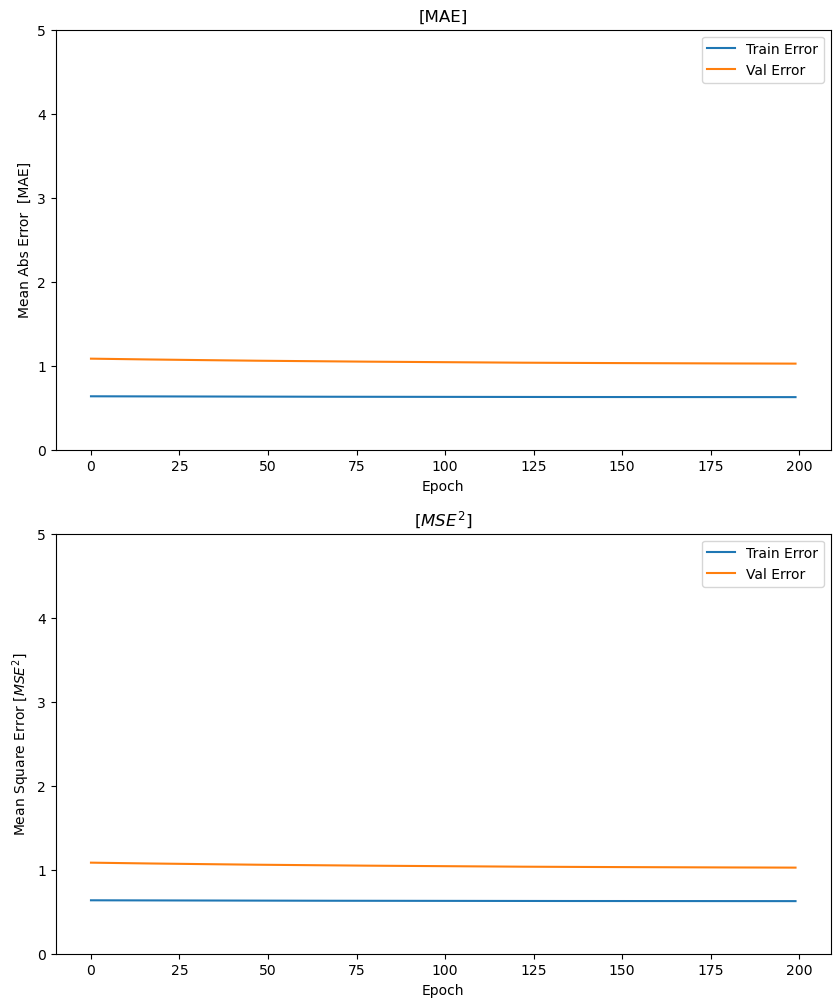

In [34]:
plot_history()

#### [6] 평가 WITH 테스트 데이터 <hr>

In [35]:
loss, mae, mse = irisModel.evaluate(data, target, verbose=1)

print(f"\n테스트 세트의 평균 절대 오차: {mae:5.2f}")

5/5 [==============================] - 0s 2ms/step - loss: 0.6216 - mae: 0.7059 - mse: 0.6216

테스트 세트의 평균 절대 오차:  0.71


#### [7] 예측 WITH 사용되지 않은 데이터 <hr>

5/5 [==============================] - 0s 2ms/step
pre_ : [[0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.98839706]
 [0.

(0.0, 3.574035223424435)

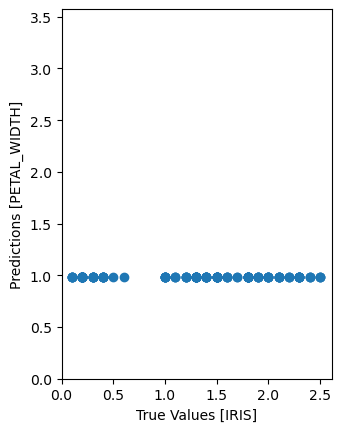

In [36]:
pre_ = irisModel.predict(data)
print(f'pre_ : {pre_}')

plt.scatter(target, pre_)
plt.xlabel('True Values [IRIS]')
plt.ylabel('Predictions [PETAL_WIDTH]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

In [37]:
### 모델 속성 정보 출력 함수 -----------------------------------------------------------
def display_info():
    # 모델 객체의 입력 텐서 정보 
    print(f'입력 텐서 정보 : {irisModel.inputs}\n')
    
    # 모델 객체의 출력 텐서 정보 
    print(f'출력 텐서 정보 : {irisModel.outputs}\n')
    
    # 모델 구성 층 객체 정보
    print(f'구성 층 정보 : {irisModel.layers}\ng')
    
    # 해당 층에 대한 정보 확인 => Model.layers 리스트로 인덱스 접근
    print(f'0번 층에 대한 weights 정보\n{irisModel.layers[0].weights}\n')
    
    # 모델 객체 전체에 대한 가중치
    print(f'모델 전체 층에 대한 weights 정보\n{irisModel.weights}\n')
    

In [39]:
display_info()

입력 텐서 정보 : [<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'In_input')>]

출력 텐서 정보 : [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Out')>]

구성 층 정보 : [<keras.layers.core.dense.Dense object at 0x000002661000EAC0>, <keras.layers.core.activation.Activation object at 0x000002661000EB20>, <keras.layers.core.dense.Dense object at 0x000002660ECC5EE0>, <keras.layers.core.dense.Dense object at 0x000002660FFFE220>]
g
0번 층에 대한 weights 정보
[<tf.Variable 'In/kernel:0' shape=(3, 10) dtype=float32, numpy=
array([[ 0.54414237, -0.19680831,  0.474196  ,  0.18949229, -0.01023906,
        -0.6186558 , -0.50740576,  0.65684444,  0.7393706 , -0.34051955],
       [-0.03835972,  0.42926702,  0.10868105, -0.14481205,  0.2302647 ,
        -0.16045582, -0.21361846, -0.14334422, -0.39692125, -0.6537355 ],
       [ 0.26868182,  0.18082196, -0.13089754,  0.53526574,  0.55909   ,
         0.25267047,  0.5204735 ,  0.51670504, -0.16066742, -0.1957612 ]],
      dtype=float32)>, <tf.Var

In [38]:
# 현재 모델에 대한 설정을 모두 가져옮 => dict 타입
config_=irisModel.get_config()
for k, v in config_.items():
    print(f'{k} => {v}')
m3=Sequential.from_config(config_)
m3.summary()

name => iris_model
layers => [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'In_input'}}, {'class_name': 'Dense', 'config': {'name': 'In', 'trainable': True, 'batch_input_shape': (None, 3), 'dtype': 'float32', 'units': 10, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Activation', 'config': {'name': 'activation', 'trainable': True, 'dtype': 'float32', 'activation': 'relu'}}, {'class_name': 'Dense', 'config': {'name': 'Hidd', 'trainable': True, 'dtype': 'float32', 'units': 8, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {

### [4] 모델 저장 및 로딩 <hr>

In [40]:
###  모델 저장 => 구조+가중치 =>  *.h5/ .hdf5 / .keras
model_filename='./iris_model.h5'
model_filename2='./iris_model.keras'

irisModel.save(model_filename)
irisModel.save(model_filename2)

In [41]:
w_file ='./iris_weights'

# 저장 => iris_weights.data, iris_weights.index
irisModel.save_weights(w_file)

In [42]:
# 가중치 로딩
irisModel.load_weights(w_file)